In [2]:
import keras as K
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


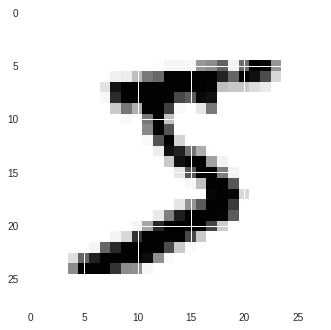

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = K.utils.to_categorical(y_train)
y_test = K.utils.to_categorical(y_test)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
plt.imshow(np.squeeze(x_train[0]))

In [4]:
nn= K.Sequential()
nn.add(K.layers.Conv2D(128, kernel_size=7, activation='relu', input_shape=(28,28,1)))
nn.add(K.layers.Conv2D(64, kernel_size=6, activation='relu'))
nn.add(K.layers.Conv2D(128, kernel_size=3, activation='relu'))
nn.add(K.layers.Conv2D(64, kernel_size=2, activation='relu'))
nn.add(K.layers.Conv2D(128, kernel_size=2, activation='relu'))
nn.add(K.layers.Conv2D(64, kernel_size=2, activation='relu'))
nn.add(K.layers.Flatten())
nn.add(K.layers.Dense(103))
nn.add(K.layers.Activation('relu'))
nn.add(K.layers.Dense(75))
nn.add(K.layers.Activation('relu'))
nn.add(K.layers.Dense(49))
nn.add(K.layers.Activation('relu'))
nn.add(K.layers.Dense(21))
nn.add(K.layers.Activation('relu'))
nn.add(K.layers.Dense(10))
nn.add(K.layers.Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
nn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=K.optimizers.Adam(lr=0.001, decay=0.3))

In [6]:
nn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 45s - loss: 0.5046 - acc: 0.8564 - val_loss: 0.3320 - val_acc: 0.9124
Epoch 2/10
 - 43s - loss: 0.3137 - acc: 0.9154 - val_loss: 0.2847 - val_acc: 0.9253
Epoch 3/10
 - 43s - loss: 0.2790 - acc: 0.9245 - val_loss: 0.2625 - val_acc: 0.9300
Epoch 4/10
 - 43s - loss: 0.2603 - acc: 0.9296 - val_loss: 0.2478 - val_acc: 0.9338
Epoch 5/10
 - 43s - loss: 0.2475 - acc: 0.9335 - val_loss: 0.2374 - val_acc: 0.9370
Epoch 6/10
 - 43s - loss: 0.2384 - acc: 0.9362 - val_loss: 0.2293 - val_acc: 0.9397
Epoch 7/10
 - 43s - loss: 0.2312 - acc: 0.9381 - val_loss: 0.2241 - val_acc: 0.9410
Epoch 8/10
 - 43s - loss: 0.2255 - acc: 0.9399 - val_loss: 0.2179 - val_acc: 0.9434
Epoch 9/10
 - 43s - loss: 0.2206 - acc: 0.9410 - val_loss: 0.2141 - val_acc: 0.9445
Epoch 10/10
 - 43s - loss: 0.2165 - acc: 0.9423 - val_loss: 0.2103 - val_acc: 0.9462


In [8]:
nn.predict(x_test[:4])

array([[1.7219983e-07, 1.0798070e-06, 5.8422453e-04, 2.1495635e-04,
        5.7165579e-09, 9.2758805e-09, 3.3480148e-08, 9.9918157e-01,
        3.2073319e-07, 1.7635559e-05],
       [1.1145615e-06, 2.1149211e-04, 9.6728021e-01, 2.1767842e-02,
        5.1927123e-05, 3.2044674e-04, 1.0265210e-02, 7.0410415e-08,
        1.0136467e-04, 1.9995380e-07],
       [1.1701460e-04, 9.9376655e-01, 2.8799224e-04, 2.3517247e-05,
        8.0745140e-06, 1.1879063e-03, 9.5130335e-06, 1.9396355e-03,
        2.1081138e-03, 5.5159145e-04],
       [9.9719429e-01, 1.5681403e-03, 4.0108029e-07, 6.6417080e-08,
        8.4098462e-09, 6.4788509e-08, 9.7675183e-07, 1.0974179e-04,
        1.1106252e-03, 1.5564932e-05]], dtype=float32)

In [9]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)